# James Artuso
# Programming Exercise \#3
---

# Preamble

In [ ]:
# import relevant Python libraries

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Non-centered Data and Principal Component Analysis (PCA)**

## 1.1

In [ ]:
A = np.random.randn(3,2)
c = np.sqrt(3) * np.random.randn(3,1)

## 1.2

In [ ]:
b = np.random.randn(2,250)
x = (np.matmul(A,b) + c).T

## 1.3

In [ ]:
print(f'Rank: {np.linalg.matrix_rank(x)}')

Rank: 3


## 1.4

If c is a linear combination of the columns of A, then it will not move the data such that it is no longered centered around the origin. So, any two linear combinations of the columns of A will work. In the code below, I have choosen the three times the first column of A and -1 times the second column of A as example values of c.

In [ ]:
x_test1 = (np.matmul(A,b) + 3*np.reshape(A[0:3,0], [3,1])).T
x_test2 = (np.matmul(A,b) - np.reshape(A[0:3,1], [3,1])).T
#The rank of both should be two if the data is still centered.
print(f'Rank of first test: {np.linalg.matrix_rank(x_test1)}')
print(f'Rank of second test: {np.linalg.matrix_rank(x_test2)}')

Rank of first test: 2
Rank of second test: 2


## 1.5

### (a)

In [ ]:
_,_,V = np.linalg.svd(x)
U = V[[0,1],:].T

### (b)

In [ ]:
x_hat = np.matmul(U,np.matmul(U.T,x.T)).T

In [ ]:
def findMSE(x, x_hat):
  error = x-x_hat
  return np.sum(np.square(np.linalg.norm(error, axis = 1)))

### (c)

In [ ]:
print(f'Error: {findMSE(x,x_hat)}')

Error: 138.47320031544712


## 1.6

In [ ]:
mu = np.mean(x, axis = 0)
x_cent = x-mu
_,_,V_cent = np.linalg.svd(x_cent)
U_cent = V_cent[[0,1],:].T
x_hat_cent = np.matmul(U_cent, np.matmul(U_cent.T, x_cent.T)).T + mu

print(f'Error: {findMSE(x,x_hat_cent)}')

Error: 8.819526550129132e-29


# **2. Preprocessing (Centering) and PCA Using `scikit learn`**

## 2.1

In [ ]:
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp

## 2.2

In [ ]:
mean_datascalar = sklpp.StandardScaler(with_mean=True, with_std=False)
skl_centered_x = mean_datascalar.fit_transform(x)
print(f'Mean vector from 1.6: {mu}')
print(f'Mean vector from scikit: {mean_datascalar.mean_}')

Mean vector from 1.6: [-2.88261719  1.02447826  0.89414214]
Mean vector from scikit: [-2.88261719  1.02447826  0.89414214]


## 2.3

In [ ]:
print(f'X vs X_skl: {findMSE(x_cent, skl_centered_x)}')

X vs X_skl: 0.0


## 2.4

In [ ]:
data_pca = skldecomp.PCA(n_components=2, svd_solver='full')
skl_features = data_pca.fit_transform(skl_centered_x)

## 2.5

In [ ]:
print(U_cent.T)
print(data_pca.components_)
#The vectors may be off by a multiple of -1. This is fine since they 
#are the same vector just in opposite directions.

[[ 0.43676665  0.79241924  0.42580118]
 [ 0.4301428   0.23174942 -0.87250752]]
[[ 0.43676665  0.79241924  0.42580118]
 [-0.4301428  -0.23174942  0.87250752]]


## 2.6

In [ ]:
skl_cent = data_pca.inverse_transform(skl_features) + mean_datascalar.mean_

## 2.7

In [ ]:
print(f'X vs skl_X_cent: {findMSE(x_hat_cent, skl_cent)}')

X vs skl_X_cent: 2.8701594700818547e-28


# **3. PCA on a Real-world Dataset**

In [ ]:
from sklearn.datasets import load_digits
X, _ = load_digits(n_class = 1, return_X_y=True)

## 3.1

The number of samples is 178 and the number of features is 64. This is because the dataset is 178 x 64. The 64 is the 8x8 image flattened.

In [ ]:
def grayImage(index, data):
  img = np.zeros([8,8])
  for i in range(8):
    img[i,:] = data[index, (i*8):(i*8+8)]
  plt.gray()
  plt.matshow(img)

<Figure size 432x288 with 0 Axes>

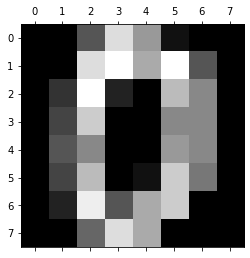

In [ ]:
grayImage(0,X)

## 3.2

(64,)


<Figure size 432x288 with 0 Axes>

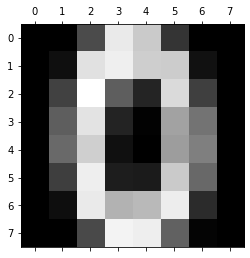

In [ ]:
X_mu = np.mean(X, axis = 0)
print(X_mu.shape)
grayImage(0,np.array([X_mu]))

## 3.3

In [ ]:
X_cent = X-X_mu
_,S,V = np.linalg.svd(X_cent)

## 3.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

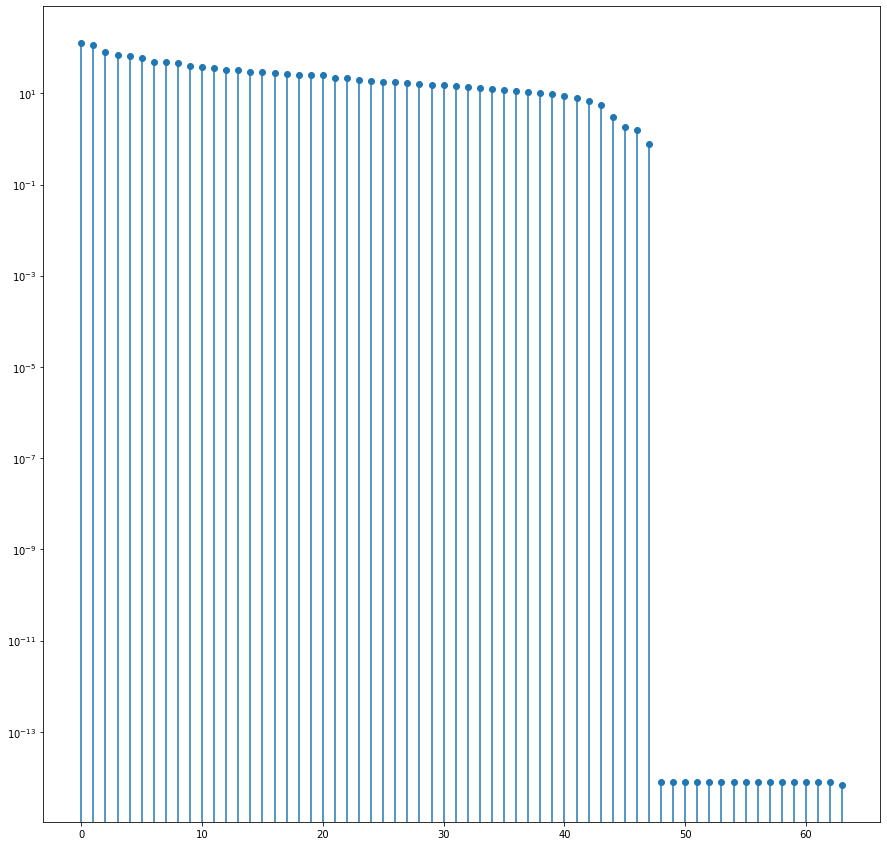

In [ ]:
fig = plt.figure(figsize = [15,15])
plt.yscale('log')
plt.stem(S)

## 3.5

In [ ]:
def findEnergy(sig, max_val, start_val = 0):
  useSig = sig[start_val:max_val]
  return sum(np.square(useSig))

In [ ]:
k = 0
minnp = min(X.shape)
maxcaptured = findEnergy(S, minnp)
for i in range(minnp):
  if((findEnergy(S, i)/maxcaptured) >= 0.90):
    k = i
    break
print(f'Number of principle components needed: {k}')
print(f'Percent of energy captured by 17 components: {findEnergy(S, k-1)/maxcaptured}')
print(f'Percent of energy captured by 18 components: {findEnergy(S, k)/maxcaptured}')

Number of principle components needed: 18
Percent of energy captured by 17 components: 0.8952509003043135
Percent of energy captured by 18 components: 0.9053591196887667


## 3.6

In [ ]:
real_data = skldecomp.PCA(n_components = 0.90, svd_solver = 'full')
data_features = real_data.fit_transform(X)
print(f'Number of principle components needed: {real_data.n_components_}')
print(f'Verify 3.5 matches 3.6: k ==  n_components_ -> {k == real_data.n_components_}')

Number of principle components needed: 18
Verify 3.5 matches 3.6: k ==  n_components_ -> True


## 3.7

(64, 64)


<Figure size 432x288 with 0 Axes>

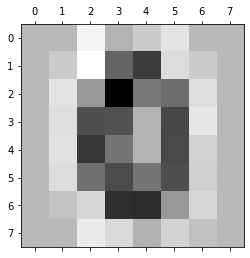

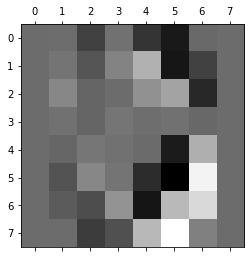

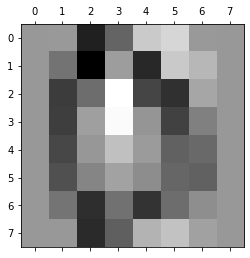

In [ ]:
print(V.shape)
grayImage(0, V)
grayImage(1, V)
grayImage(2, V)

## 3.8

In [ ]:
A = V[0:3, :]
X_cent_f = np.matmul(A, X_cent.T).T

## 3.9

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


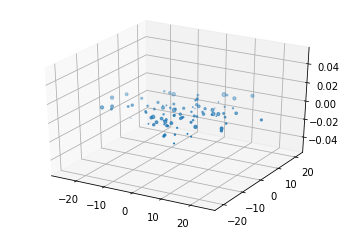

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(X_cent_f[:,0], X_cent_f[:,1], X_cent_f[:,2])

## 3.10

In [ ]:
X_cent_hat = np.matmul(A.T, X_cent_f.T)
X_hat = X_cent_hat.T + X_mu

## 3.11

In [ ]:
#Using scikit learn to verify
mean_datascalar = sklpp.StandardScaler(with_mean=True, with_std=False)
skl_centered_x = mean_datascalar.fit_transform(X)
data_pca = skldecomp.PCA(n_components=3, svd_solver='full')
skl_features = data_pca.fit_transform(skl_centered_x)
skl_cent = data_pca.inverse_transform(skl_features) + mean_datascalar.mean_

print(f'Average PCA error: {findMSE(X, X_hat)/178}')
print(f'Average PCA error using scikit learn: {findMSE(X,skl_cent)/178}')
print(f'Average PCA error from Singular Values: {findEnergy(S,minnp, start_val = 3)/178}')

Average PCA error: 202.52814947043325
Average PCA error using scikit learn: 202.52814947043325
Average PCA error from Singular Values: 202.5281494704331


## 3.12

<Figure size 432x288 with 0 Axes>

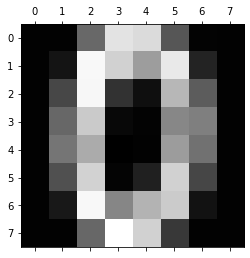

In [ ]:
grayImage(0, X_hat)

# **4. PCA as a Denoising Tool**

## 4.1

In [ ]:
a = np.random.randn(3,1)

## 4.2

In [ ]:
b = np.random.randn(100,1)*2
X = np.matmul(b, a.T)

## 4.3

In [ ]:
n = np.random.randn(100, 3) * np.sqrt(0.05)
y = X + n

(100, 3)


## 4.4

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


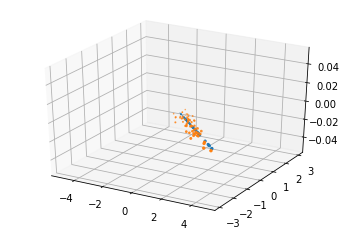

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(X[:,0], X[:,1], X[:,2])
plt.scatter(y[:, 0], y[:,1], y[:,2])

## 4.5

In [ ]:
denoise_pca = skldecomp.PCA(n_components = 1, svd_solver = 'full')
denoise_features = denoise_pca.fit_transform(y)
X_denoise_hat = denoise_pca.inverse_transform(denoise_features)

## 4.6

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


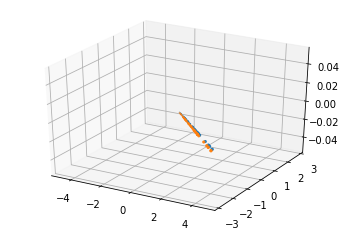

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(X[:,0], X[:,1], X[:,2])
plt.scatter(X_denoise_hat[:, 0], X_denoise_hat[:,1], X_denoise_hat[:,2])

## 4.7

In [ ]:
print(f'Average error per noisy sample: {findMSE(X, y)/100}')
print(f'Average error per denoised sample: {findMSE(X, X_denoise_hat)/100}')

Average error per noisy sample: 0.14416922887209663
Average error per denoised sample: 0.05432440297792632


## 4.8

Because PCA essentially maps data to a subspace, the variations caused by noise will be removed. This is because the data woud normally fall along a subspace, however noise makes it diverge from that subspace. By doing PCA, the noise is essentially removed.
